In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [46]:
data = pd.read_csv("smoking_driking_dataset.csv")

In [47]:
duplicate_rows = data[data.duplicated()]
print("Dataset shape", data.shape, "number of duplicate rows: ", duplicate_rows.shape[0])

data = data.drop_duplicates()
print("Dataset shape after removing duplicated rows", data.shape)

Dataset shape (991346, 24) number of duplicate rows:  26
Dataset shape after removing duplicated rows (991320, 24)


In [48]:
data = data[['sex', 'age', 'SMK_stat_type_cd', 'DRK_YN', 'hemoglobin']]

In [49]:
# Check the dataset information
# No null values
# Two clumns with object datatype: sex, DRK_YN (Drinker or not)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991320 entries, 0 to 991345
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   SMK_stat_type_cd  991320 non-null  float64
 3   DRK_YN            991320 non-null  object 
 4   hemoglobin        991320 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 45.4+ MB


In [50]:
# Check the statistics of each column
# Comparing Minimum, Maximum, and Mean values, we can infer that there is no outlier.

data.describe()

,age,SMK_stat_type_cd,hemoglobin
count,991320.000000,991320.000000,991320.000000
mean,47.614529,1.608112,14.229810
std,14.181346,0.818504,1.584924
min,20.000000,1.000000,1.000000
25%,35.000000,1.000000,13.200000
50%,45.000000,1.000000,14.300000
75%,60.000000,2.000000,15.400000
max,85.000000,3.000000,25.000000


In [51]:
outlier_rows = data[data['hemoglobin'] == 1]
print("Dataset shape", data.shape, "number of outlier rows: ", outlier_rows.shape[0])

data = data.drop(index=outlier_rows.index)
print("Dataset shape after removing outlier rows", data.shape)

Dataset shape (991320, 5) number of outlier rows:  3
Dataset shape after removing outlier rows (991317, 5)


In [52]:
data.isnull().sum()

sex                 0
age                 0
SMK_stat_type_cd    0
DRK_YN              0
hemoglobin          0
dtype: int64

In [53]:
print(data['sex'].value_counts(), '\n')
print(data['DRK_YN'].value_counts(), '\n')
print(data['SMK_stat_type_cd'].value_counts(), '\n')
print('Age\n', data['age'].value_counts(), '\n')

Male      526397
Female    464920
Name: sex, dtype: int64 

N    495842
Y    495475
Name: DRK_YN, dtype: int64 

1.0    602428
3.0    213945
2.0    174944
Name: SMK_stat_type_cd, dtype: int64 

Age
 40    130381
50    129429
45    118353
55    111221
60    106062
35     84722
30     77597
25     64369
65     52957
70     50665
75     25332
20     21970
80     14968
85      3291
Name: age, dtype: int64 



In [54]:
from scipy.stats import chi2_contingency

In [55]:
data.describe()

,age,SMK_stat_type_cd,hemoglobin
count,991317.000000,991317.000000,991317.000000
mean,47.614522,1.608114,14.229850
std,14.181339,0.818505,1.584759
min,20.000000,1.000000,2.800000
25%,35.000000,1.000000,13.200000
50%,45.000000,1.000000,14.300000
75%,60.000000,2.000000,15.400000
max,85.000000,3.000000,25.000000


In [56]:
# Make a new low to categorize low hemoglobin

data['hemoglobin_low'] = 0
data.head()

,sex,age,SMK_stat_type_cd,DRK_YN,hemoglobin,hemoglobin_low
0,Male,35,1.0,Y,17.1,0
1,Male,30,3.0,N,15.8,0
2,Male,40,1.0,N,15.8,0
3,Male,50,1.0,N,17.6,0
4,Male,50,1.0,N,13.8,0


In [57]:
# The amount of hemoglobin in whole blood is expressed in grams per deciliter (g/dl). 
# The normal Hb level for males is 14 to 18 g/dl; that for females is 12 to 16 g/dl. 

data.loc[(data['sex']=='Male') & (data['hemoglobin'] < 14), 'hemoglobin_low'] = 1
data.loc[(data['sex']=='Female') & (data['hemoglobin'] < 12), 'hemoglobin_low'] = 1

observed_data = pd.crosstab(data['sex'], data['hemoglobin_low'], margins = False)


# Chi-square Test (between sex and hemoglobin)

chi2, p_value, _, _ = chi2_contingency(observed_data)
print(f"chi2: {chi2}, p_value: {p_value}")

# Compare p-value with alpha (e.g., alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("There is a significant association between sex and hemoglobin.")
else:
    print("There is no significant association between sex and hemoglobin.")

chi2: 86.53281595980702, p_value: 1.3743771138844652e-20
There is a significant association between sex and hemoglobin.


In [58]:
# The amount of hemoglobin in whole blood is expressed in grams per deciliter (g/dl). 
# The normal Hb level for males is 14 to 18 g/dl; that for females is 12 to 16 g/dl. 

observed_data = pd.crosstab(data['age'], data['hemoglobin_low'], margins = False)


# Chi-square Test (between age and hemoglobin)

chi2, p_value, _, _ = chi2_contingency(observed_data)
print(f"chi2: {chi2}, p_value: {p_value}")

# Compare p-value with alpha (e.g., alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("There is a significant association between age and hemoglobin.")
else:
    print("There is no significant association between age and hemoglobin.")

chi2: 36264.491397368576, p_value: 0.0
There is a significant association between age and hemoglobin.


In [59]:
observed_data = pd.crosstab(data['SMK_stat_type_cd'], data['hemoglobin_low'], margins = False)


# Chi-square Test (between Smoking status and hemoglobin)

chi2, p_value, _, _ = chi2_contingency(observed_data)
print(f"chi2: {chi2}, p_value: {p_value}")

# Compare p-value with alpha (e.g., alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("There is a significant association between smoking and hemoglobin.")
else:
    print("There is no significant association between smoking and hemoglobin.")

chi2: 4028.8988044508774, p_value: 0.0
There is a significant association between smoking and hemoglobin.


In [60]:
observed_data = pd.crosstab(data['DRK_YN'], data['hemoglobin_low'], margins = False)


# Chi-square Test (between Smoking status and hemoglobin)

chi2, p_value, _, _ = chi2_contingency(observed_data)
print(f"chi2: {chi2}, p_value: {p_value}")

# Compare p-value with alpha (e.g., alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("There is a significant association between drinking and hemoglobin.")
else:
    print("There is no significant association between drinking and hemoglobin.")

chi2: 4749.627265607225, p_value: 0.0
There is a significant association between drinking and hemoglobin.


In [61]:
# Change the object datatype to numerical
# Change the value 1~3 to -1~1 to make data close to mean of 0

data.loc[data['sex']=='Male', 'sex'] = 1      # male: 1
data.loc[data['sex']=='Female', 'sex']  = -1  # Female: -1
data.loc[data['DRK_YN']=='N', 'DRK_YN'] = -1  # Not drinker: -1
data.loc[data['DRK_YN']=='Y', 'DRK_YN']  = 1  # Drinker: 1

data['SMK_stat_type_cd'] -= 2                 # Never: -1, Used to smoke but quit: 0, Still smoke: 1

In [62]:
df = data.copy()

In [63]:
print('Sex\n', df['sex'].value_counts(), '\n')
print('Drinking\n', df['DRK_YN'].value_counts(), '\n')
print('Smoking\n', df['SMK_stat_type_cd'].value_counts(), '\n')

Sex
  1    526397
-1    464920
Name: sex, dtype: int64 

Drinking
 -1    495842
 1    495475
Name: DRK_YN, dtype: int64 

Smoking
 -1.0    602428
 1.0    213945
 0.0    174944
Name: SMK_stat_type_cd, dtype: int64 



In [64]:
# Check the statistics of each column again

df.describe()

,age,SMK_stat_type_cd,hemoglobin,hemoglobin_low
count,991317.000000,991317.000000,991317.000000,991317.000000
mean,47.614522,-0.391886,14.229850,0.119639
std,14.181339,0.818505,1.584759,0.324539
min,20.000000,-1.000000,2.800000,0.000000
25%,35.000000,-1.000000,13.200000,0.000000
50%,45.000000,-1.000000,14.300000,0.000000
75%,60.000000,0.000000,15.400000,0.000000
max,85.000000,1.000000,25.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991317 entries, 0 to 991345
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991317 non-null  object 
 1   age               991317 non-null  int64  
 2   SMK_stat_type_cd  991317 non-null  float64
 3   DRK_YN            991317 non-null  object 
 4   hemoglobin        991317 non-null  float64
 5   hemoglobin_low    991317 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 52.9+ MB


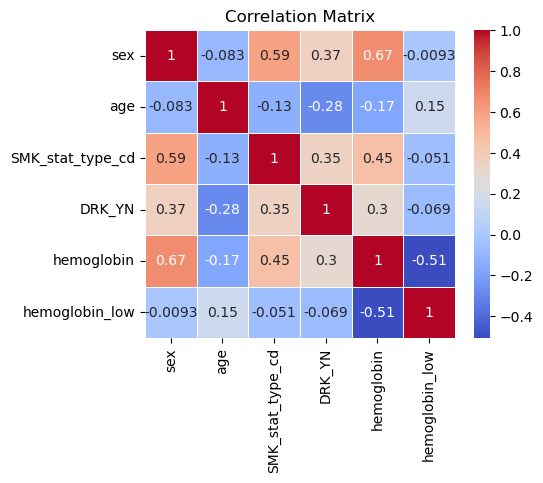

In [66]:
corr_matrix = df.corr(numeric_only=False)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [67]:
# Data is too big for visualization 
# To check the important features, visualize the data with a part of the data

sample_row = np.random.randint(low=0, high=df.shape[0], size=10000)
sample_df = df.iloc[sample_row, :]

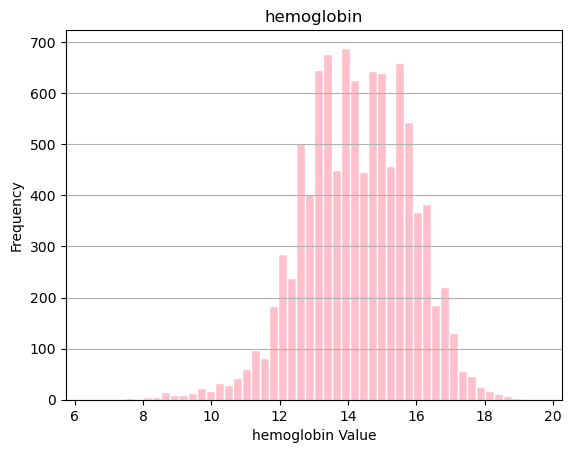

In [68]:
# hemoglobin histogram

plt.hist(sample_df['hemoglobin'], bins=50, color='pink', edgecolor='white')
plt.xlabel('hemoglobin Value')
plt.ylabel('Frequency')
plt.title('hemoglobin')
plt.grid(axis='y')

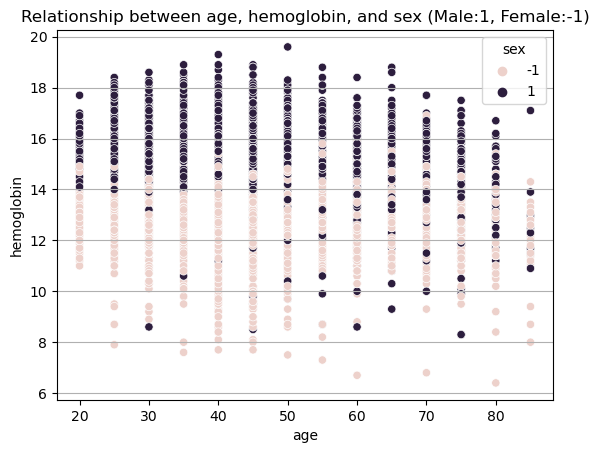

In [69]:
sns.scatterplot(data=sample_df, x='age', y='hemoglobin', hue='sex')

plt.title('Relationship between age, hemoglobin, and sex (Male:1, Female:-1)')
plt.grid(axis='y')

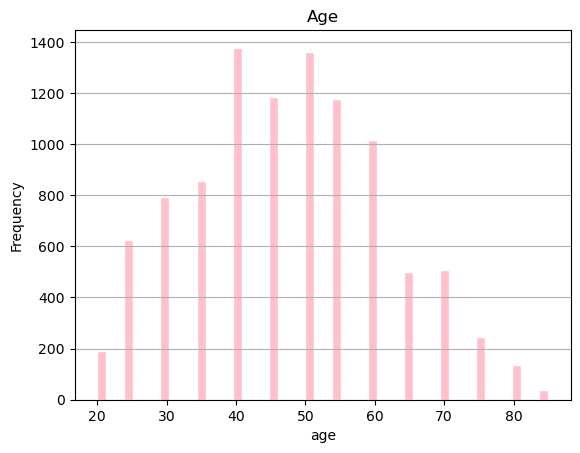

In [70]:
# Age histogram

plt.hist(sample_df['age'], bins=50, color='pink', edgecolor='white')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age')
plt.grid(axis='y')

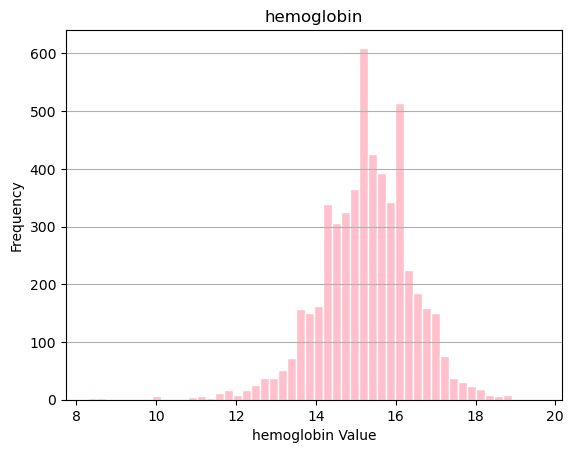

In [71]:
# hemoglobin histogram of Male

plt.hist(sample_df.loc[sample_df['sex']==1]['hemoglobin'], bins=50, color='pink', edgecolor='white')
plt.xlabel('hemoglobin Value')
plt.ylabel('Frequency')
plt.title('hemoglobin')
plt.grid(axis='y')

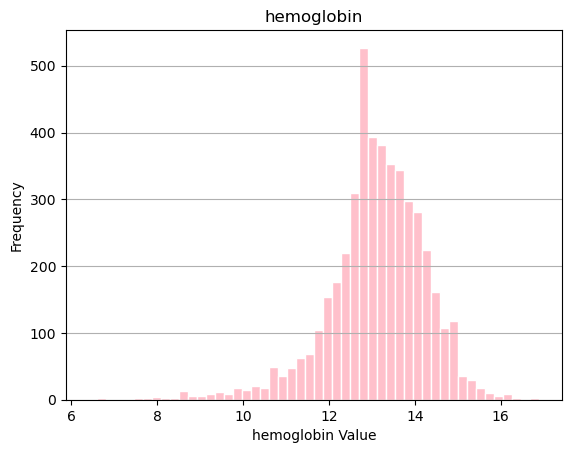

In [72]:
# hemoglobin histogram of Female

plt.hist(sample_df.loc[sample_df['sex']==-1]['hemoglobin'], bins=50, color='pink', edgecolor='white')
plt.xlabel('hemoglobin Value')
plt.ylabel('Frequency')
plt.title('hemoglobin')
plt.grid(axis='y')

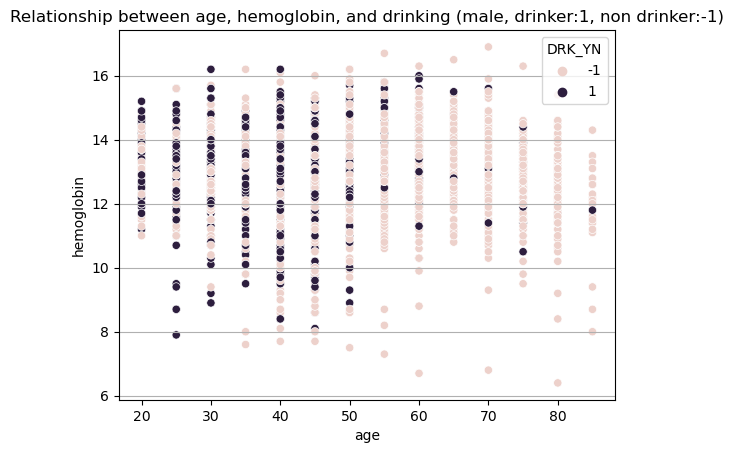

In [73]:
sns.scatterplot(data=sample_df[sample_df['sex']==-1], x='age', y='hemoglobin', hue='DRK_YN')

plt.title('Relationship between age, hemoglobin, and drinking (male, drinker:1, non drinker:-1)')
plt.grid(axis='y')

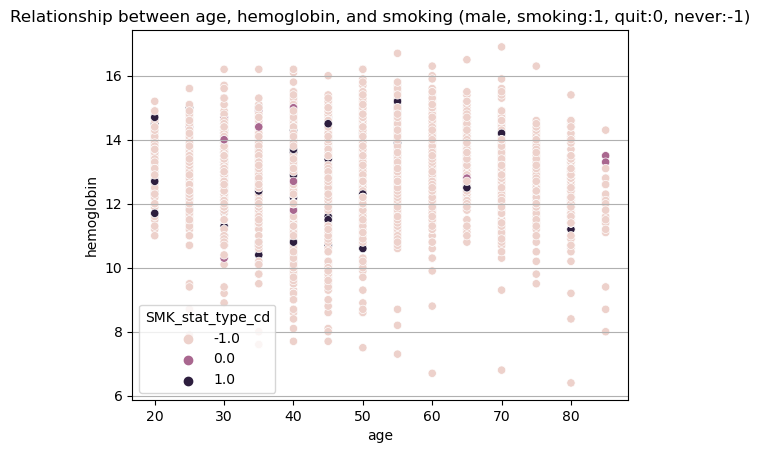

In [74]:
sns.scatterplot(data=sample_df[sample_df['sex']==-1], x='age', y='hemoglobin', hue='SMK_stat_type_cd')

plt.title('Relationship between age, hemoglobin, and smoking (male, smoking:1, quit:0, never:-1)')
plt.grid(axis='y')

In [75]:
df = df.drop(columns=['hemoglobin_low'])

## Model 

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
# Data is too big for quantile regression
# To check the model feasibility first, train the model with a part of the data

sample_row = np.random.randint(low=0, high=df.shape[0], size=10000)
sample_df = df.iloc[sample_row, :]

In [78]:
def train_eval(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

    model = model

    model.fit(X_train, y_train)

    tr_pred = model.predict(X_train)
    te_pred = model.predict(X_test)

    mae_tr, mae_te = (mean_absolute_error(y_train, tr_pred), mean_absolute_error(y_test, te_pred))
    rmse_tr, rmse_te = np.sqrt(mean_squared_error(y_train, tr_pred)), np.sqrt(mean_squared_error(y_test, te_pred))
    r2_tr, r2_te = (r2_score(y_train, tr_pred), r2_score(y_test, te_pred))
    
    coef = model.coef_
    intercept = model.intercept_
    
    return [mae_tr, mae_te, rmse_tr, rmse_te, r2_tr, r2_te, coef, intercept]

In [79]:
eval_dict_1 = dict()
for model in [LinearRegression(), Ridge(), Lasso(), ElasticNet()]:
    temp = train_eval(df[['age', 'sex']], df['hemoglobin'], model)
    eval_dict_1[model] = temp
    
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex']], df['hemoglobin'])
ratios = np.arange(0, 1, 0.1)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)

el_cv = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
el_cv.fit(X_train, y_train)

tr_pred = el_cv.predict(X_train)
te_pred = el_cv.predict(X_test)

mae_tr, mae_te = (mean_absolute_error(y_train, tr_pred), mean_absolute_error(y_test, te_pred))
rmse_tr, rmse_te = np.sqrt(mean_squared_error(y_train, tr_pred)), np.sqrt(mean_squared_error(y_test, te_pred))
r2_tr, r2_te = (r2_score(y_train, tr_pred), r2_score(y_test, te_pred))
coef = model.coef_
intercept = model.intercept_

eval_dict_1['ElasticNetCV'] = [mae_tr, mae_te, rmse_tr, rmse_te, r2_tr, r2_te, coef, intercept]

In [80]:
eval_dict_2 = dict()

X = df.loc[:, ['SMK_stat_type_cd', 'DRK_YN']]
y = df.loc[:, ['hemoglobin']]

for model in [LinearRegression(), Ridge(), Lasso(), ElasticNet()]:
    temp = train_eval(X, y, model)
    eval_dict_2[model] = temp
    
X_train, X_test, y_train, y_test = train_test_split(df[['SMK_stat_type_cd', 'DRK_YN']], df['hemoglobin'])

el_cv = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
el_cv.fit(X_train, y_train)

tr_pred = el_cv.predict(X_train)
te_pred = el_cv.predict(X_test)

mae_tr, mae_te = (mean_absolute_error(y_train, tr_pred), mean_absolute_error(y_test, te_pred))
rmse_tr, rmse_te = np.sqrt(mean_squared_error(y_train, tr_pred)), np.sqrt(mean_squared_error(y_test, te_pred))
r2_tr, r2_te = (r2_score(y_train, tr_pred), r2_score(y_test, te_pred))
coef = model.coef_
intercept = model.intercept_

eval_dict_2['ElasticNetCV'] = [mae_tr, mae_te, rmse_tr, rmse_te, r2_tr, r2_te, coef, intercept]

In [81]:
evaluation_1 = pd.DataFrame(eval_dict_1, index=['mae_tr', 'mae_te', 'rmse_tr', 'rmse_te', 
                                                'r2_tr', 'r2_te', 'coef', 'intercept'])
evaluation_1

,LinearRegression(),Ridge(),Lasso(),ElasticNet(),ElasticNetCV
mae_tr,0.867384,0.867384,1.218975,1.03275,0.867051
mae_te,0.866122,0.866122,1.218997,1.032373,0.867165
rmse_tr,1.162598,1.162598,1.534835,1.348107,1.162098
rmse_te,1.16137,1.16137,1.535357,1.348175,1.162871
r2_tr,0.46178,0.46178,0.061954,0.276315,0.461855
r2_te,0.463049,0.463049,0.061548,0.276421,0.462824
coef,"[-0.013236938022085722, 1.0468560309193615]","[-0.013236946282373983, 1.0468546075813272]","[-0.014166931334639019, 0.04184214417293231]","[-0.014737265355653575, 0.36160938035358786]","[-0.014737265355653575, 0.36160938035358786]"
intercept,14.795528,14.795529,14.902544,14.909746,14.909746


In [82]:
evaluation_2 = pd.DataFrame(eval_dict_2, index=['mae_tr', 'mae_te', 'rmse_tr', 'rmse_te', 
                                                'r2_tr', 'r2_te', 'coef', 'intercept'])
evaluation_2

,LinearRegression(),Ridge(),Lasso(),ElasticNet(),ElasticNetCV
mae_tr,1.063671,1.063671,1.270897,1.243618,1.063422
mae_te,1.064228,1.064228,1.270804,1.243665,1.064827
rmse_tr,1.392044,1.392044,1.584709,1.557457,1.392169
rmse_te,1.393453,1.393453,1.584907,1.557814,1.393083
r2_tr,0.228374,0.228374,0.0,0.034099,0.228249
r2_te,0.227002,0.227002,-0.000003,0.033895,0.227373
coef,"[[0.7692943448855293, 0.2535685197169862]]","[[0.7692927518465255, 0.2535686371192775]]","[0.0, 0.0]","[0.07598591809622225, 0.0]","[0.07598591809622225, 0.0]"
intercept,[14.531461171973124],[14.531460548769994],[14.23050477009013],[14.260230858365775],[14.260230858365775]


In [83]:
line = pd.DataFrame({'x0':np.linspace(df['age'].max()+0.2, df['age'].min()-0.2, num=100)})
line['x1'] = np.linspace(df['sex'].max()+0.2, df['sex'].min()-0.2, num=100)

# Linear line with age feature coefficient
line['y0'] = line['x0'] * evaluation_1.iloc[6, 0][0] + evaluation_1.iloc[7, 0]   
# Linear line with sex feature coefficient
line['y1'] = line['x1'] * evaluation_1.iloc[6, 0][1] + evaluation_1.iloc[7, 0]

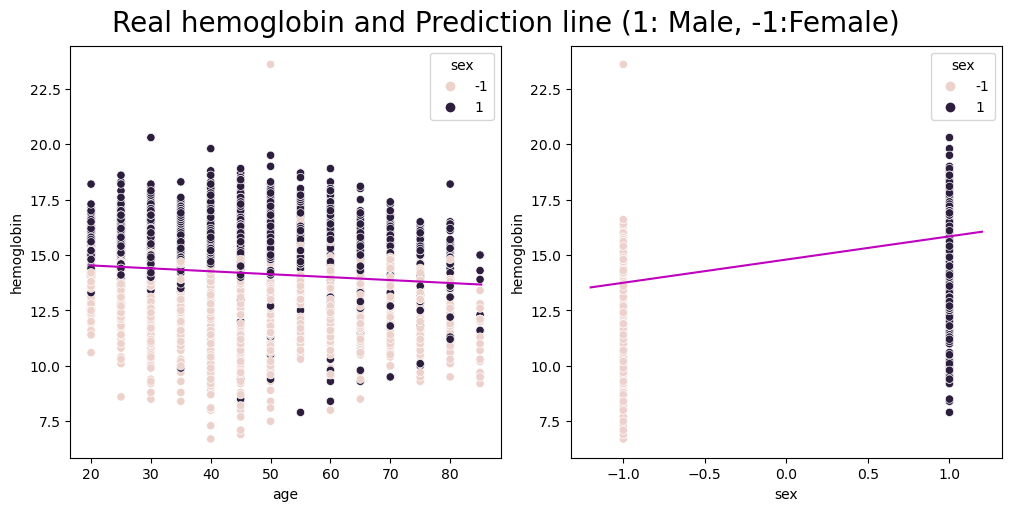

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle('Real hemoglobin and Prediction line (1: Male, -1:Female)', fontsize=20)
features = ['age', 'sex']

for i in range(2):
    sns.scatterplot(data=sample_df, x=features[i], y='hemoglobin', hue='sex', ax=axes[i])
    axes[i].plot(line['x'+str(i)], line['y'+str(i)], 'm-')

plt.show()

In [85]:
import statsmodels.formula.api as smf

# Define the quantiles of interest
quantiles = [0.2, 0.4, 0.6, 0.9]
results = []

# Fit the model for different quantiles
# Print the results
for q in quantiles:
    model = smf.quantreg('hemoglobin ~ sex + age', sample_df)
    result = model.fit(q=q)
    results.append(result)

In [86]:
for i, result in enumerate(results):
    print(f"\nQuantile: {quantiles[i]}")
    print(result.summary())


Quantile: 0.2
                         QuantReg Regression Results                          
Dep. Variable:             hemoglobin   Pseudo R-squared:               0.2602
Model:                       QuantReg   Bandwidth:                      0.1941
Method:                 Least Squares   Sparsity:                        4.228
Date:                Fri, 01 Dec 2023   No. Observations:                10000
Time:                        19:27:14   Df Residuals:                     9997
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1333      0.072    183.286      0.000      12.993      13.274
sex[T.1]       2.0667      0.035     59.272      0.000       1.998       2.135
age           -0.0167      0.001    -12.848      0.000      -0.019      -0.014

Quantile: 0.4
                      